# Importing Tensorflow

In [0]:
import tensorflow as tf

# Loading MNIST Dataset

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

# Some Utility Functions

## Initializing Weights

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(init_random_dist)

## Initializing Biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape = shape)
    return tf.Variable(init_bias_vals)

## Applying Convolution

In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

## Applying Max Pooling

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

## Adding a Convolutional Layer

In [0]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

## Adding a DNN Layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

# Placeholders

In [0]:
x = tf.placeholder(tf.float32, shape = [None, 784])

In [0]:
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [0]:
x_image = tf.reshape(x, [-1,28,28,1])

# Laying First Convolutional & Max Pooling Layer

In [0]:
convo_1 = convolutional_layer(x_image, shape = [6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

# Laying Second Convolutional & Max Pooling Layer

In [0]:
convo_2 = convolutional_layer(convo_1_pooling, shape = [6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

# Flattening Layer

In [0]:
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

# Dropout to the Dense NN Layer

In [0]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

In [0]:
y_pred = normal_full_layer(full_one_dropout, 10)

# Loss Function

In [21]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Optimizer 

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
train = optimizer.minimize(cross_entropy)

# Initializing Global Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
import time

# Session for Training

In [26]:
%%time
x_graph = []
steps = 5000
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x, batch_y = mnist.train.next_batch(50)
        sess.run(train, feed_dict={x:batch_x, y_true: batch_y, hold_prob:0.5})
        acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1)), tf.float32))
        x_graph.append(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels, hold_prob:1.0}))
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print('Accuracy is: ')
            print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels, hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is: 
0.1069


Currently on step 100
Accuracy is: 
0.8456


Currently on step 200
Accuracy is: 
0.9041


Currently on step 300
Accuracy is: 
0.9291


Currently on step 400
Accuracy is: 
0.9381


Currently on step 500
Accuracy is: 
0.9465


Currently on step 600
Accuracy is: 
0.9527


Currently on step 700
Accuracy is: 
0.9554


Currently on step 800
Accuracy is: 
0.9581


Currently on step 900
Accuracy is: 
0.963


Currently on step 1000
Accuracy is: 
0.9645


Currently on step 1100
Accuracy is: 
0.9669


Currently on step 1200
Accuracy is: 
0.9684


Currently on step 1300
Accuracy is: 
0.9665


Currently on step 1400
Accuracy is: 
0.9706


Currently on step 1500
Accuracy is: 
0.9727


Currently on step 1600
Accuracy is: 
0.9728


Currently on step 1700
Accuracy is: 
0.9756


Currently on step 1800
Accuracy is: 
0.9747


Currently on step 1900
Accuracy is: 
0.9739


Currently on step 2000
Accuracy is: 
0.9755


Currently on step 2100
Accuracy is: 
0.9762


C

In [27]:
print(len(x_graph))

5000


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

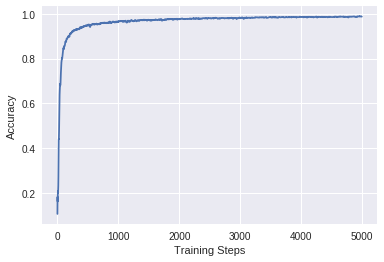

In [32]:
plt.plot(x_graph)
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')
plt.show(x_graph)